# Get Set Up

## Import Libraries

In [0]:
# Pandas provides an extremely useful data structure
import pandas as pd

# Math provides additional math functions
import math




## Load Data

In [0]:
# Define vars
intel_url = "https://raw.githubusercontent.com/urbansec/ds101/master/av_ip_reputation_2019-04-07.csv"
intel_cols = ['ip', 'risk', 'reliability', 'activity', 'country', 'city', 'lat_lon', 'unknown']


# Read intel into dataframe
intel_df = pd.read_csv(intel_url, sep='#', header=None, names=intel_cols)


# Examine Data

## Alien Vault IP Reputation Data Set
Description:

* IP - IPv4 address
* Risk - how risky is the target (1-10)
* Reliability - how reliable is the rating (1-10)
* Activity - what type of host is it
* Country - what is the IPv4 country of origin
* City - what is the IPv4 city of origin
* Latitude - geolocated latitude of the IPv4
* Longitude - geolocated longitude of the IPv4






## Look at the raw data

In [0]:
# display first 5 lines in list
display(intel_df.head())

,ip,risk,reliability,activity,country,city,lat_lon,unknown
0,46.246.124.162,4,2,Malicious Host,SE,NaN,"59.3246994019,18.0559997559",3
1,23.94.213.6,4,2,Malicious Host,US,Los Angeles,"34.0544013977,-118.244003296",3
2,23.116.185.114,4,2,Malicious Host,US,NaN,"37.7509994507,-97.8219985962",3
3,23.30.95.53,4,2,Malicious Host,US,NaN,"37.7509994507,-97.8219985962",3
4,14.58.252.223,4,2,Malicious Host,KR,NaN,"37.5111999512,126.974098206",3


# Stats on Quantitative Data: Risk

## Start with most basic stats

In [0]:
# count
record_count = len(intel_df.index)
record_count

57684

In [0]:
# total
risk_total = intel_df[['risk']].sum()
risk_total

risk    217527
dtype: int64

In [0]:
# min
risk_min = intel_df[['risk']].min()
risk_min

risk    1
dtype: int64

In [0]:
# max
risk_max = intel_df[['risk']].max()
risk_max

risk    4
dtype: int64

## Central Tendency

In [0]:
# mean (manual)
risk_mean1 = risk_total / record_count
risk_mean1

risk    3.771011
dtype: float64

In [0]:
# mean (function)
risk_mean2 = intel_df[['risk']].mean()
risk_mean2

risk    3.771011
dtype: float64

In [0]:
# stdev (manual)
#sq_err = (intel_df[['risk']].sub(risk_mean2, axis=0)) #** 2
sq_err = (intel_df[['risk']] - risk_mean2.values[0]) ** 2
sum_sq_err = sq_err.sum()
risk_stdev1 = math.sqrt(sum_sq_err / record_count)
risk_stdev1



0.7965745243444221

In [0]:
# stdev (function)
risk_stdev2 = intel_df[['risk']].std()
risk_stdev2

risk    0.796581
dtype: float64

In [0]:
# median
risk_median = intel_df[['risk']].median()
risk_median

risk    4.0
dtype: float64

In [0]:
# mode
risk_mode = intel_df[['risk']].mode()
risk_mode

,risk
0,4


**With the median and mode equal to 4, why is the mean lower?**

## Make a Histogram

**A histogram can help you understand basic statistical properties of a data set more intuitively.**

In this case, we see almost all of the data points have a risk of 4.  A few have a risk of 1, and there is nothing in between.  This is why the mode and median values are both 4, but the mean is slightly lower.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca9d8eb70>]],
      dtype=object)

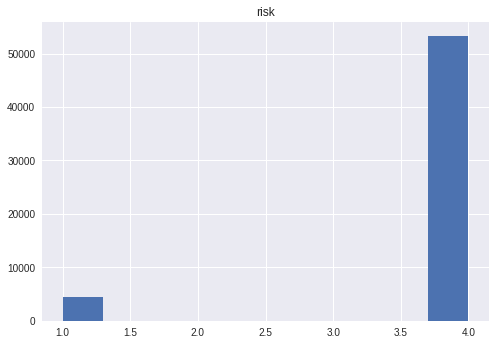

In [0]:
intel_df[['risk']].hist()

## Easier Summary Statistics: Pandas  'describe()' Method

In [0]:
intel_df[['risk']].describe()

,risk
count,57684.000000
mean,3.771011
std,0.796581
min,1.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,4.000000


# Stats on Qualitative Data: Activity

## Summary Statistics

Note that for qualitative data, a different set of statistics is generated.

In [0]:
# use describe() for quick summary stats
intel_df[['country']].describe()

,country
count,55991
unique,183
top,CN
freq,9827


Looking at the most frequent values gives an idea of what is "normal." In this case, Chinese, Russian, and US IPs dominate the list. 

In [0]:
# most frequent values
# note, using dot notation to return series rather than df
intel_df.country.value_counts().head(10)

CN    9827
RU    6522
US    5417
IN    2477
TW    1891
KR    1888
BR    1836
VN    1446
JP    1201
UA    1176
Name: country, dtype: int64

Looking at the least frequent values may or may not be useful.  These are rare occurences, by definition.  In some situations, these would be relevant anomalies.  In other situations, they would be noise.

In [0]:
# least frequent values
# note, using dot notation to return series rather than df
intel_df.country.value_counts().tail(10)

MC    1
ZW    1
ER    1
HM    1
SN    1
CV    1
TC    1
GQ    1
GG    1
TG    1
Name: country, dtype: int64